<a href="https://colab.research.google.com/github/MOsamaAS/CodexCue/blob/main/Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the Dataset**

Loading and Examining the Dataset

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Simple Linear Regression/tips.csv')

# Display the first few rows of the dataset
print(dataset)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


Checking for Missing Values and Data Types

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
data_types = dataset.dtypes
print("\nData Types:\n", data_types)

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Data Types:
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


Identifying Outliers

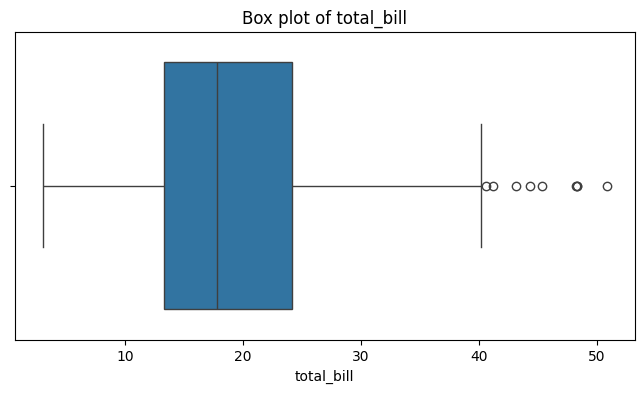

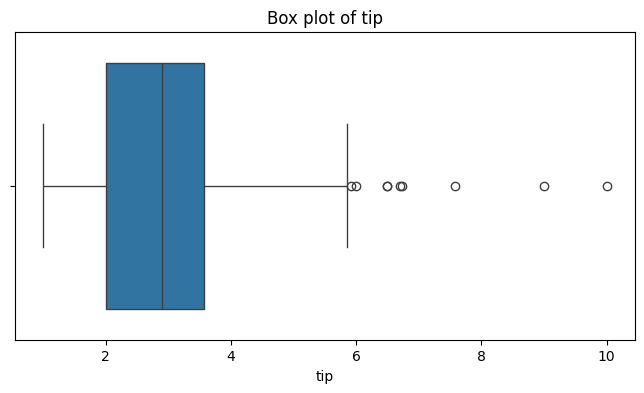

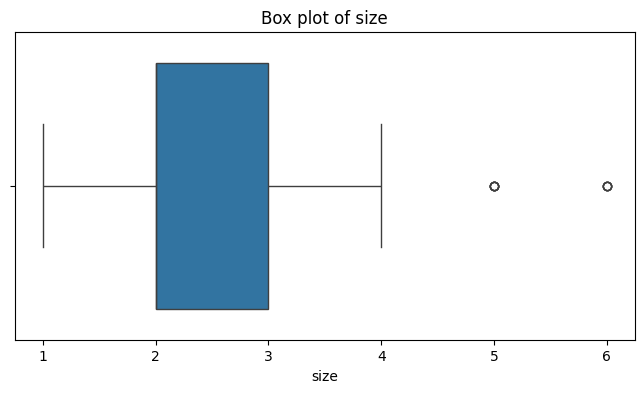

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plots for numerical columns to identify outliers
numerical_columns = ['total_bill', 'tip', 'size']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col])
    plt.title(f'Box plot of {col}')
    plt.show()

Drop Rows with Missing Values

In [ ]:
dataset = dataset.dropna()

Outlier Detection

In [ ]:
import numpy as np
from scipy import stats

numerical_cols = [ 'tip', 'size']

# Calculate Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(dataset[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 4  # Typically, a Z-score above 3 is considered an outlier

# Create a mask for data points that are not outliers
non_outliers_mask = (z_scores < threshold).all(axis=1)

print(f"Original dataset size: {dataset.shape}")

# Create a new dataset without outliers
dataset = dataset[non_outliers_mask]

print(f"Cleaned dataset size: {dataset.shape}")

Original dataset size: (244, 7)
Cleaned dataset size: (242, 7)


# **Data** **Visualization**

Visualizing Relationships

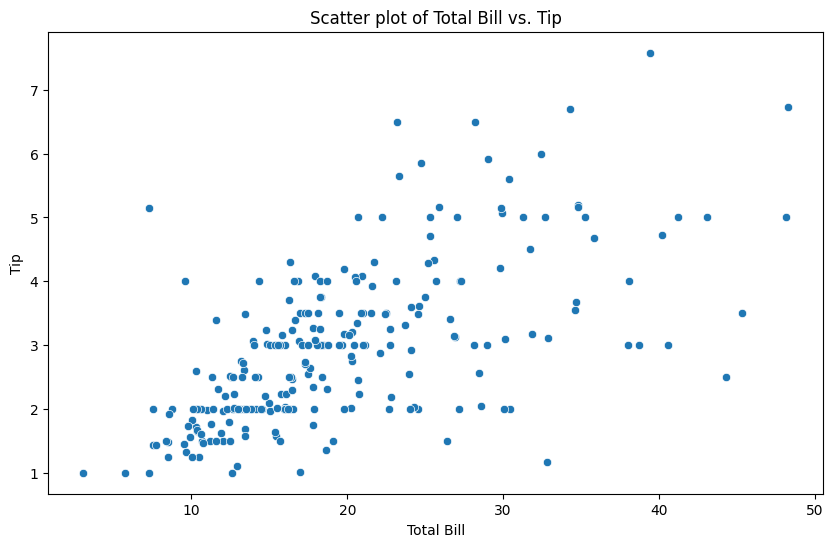

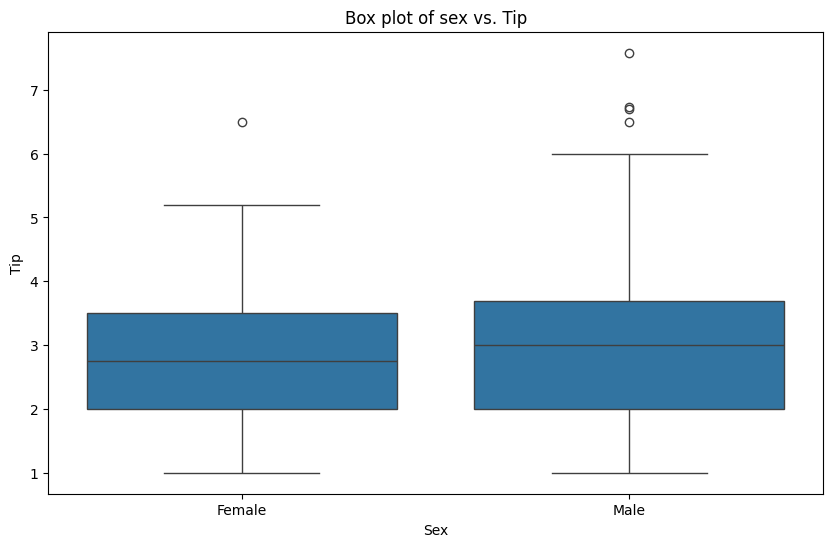

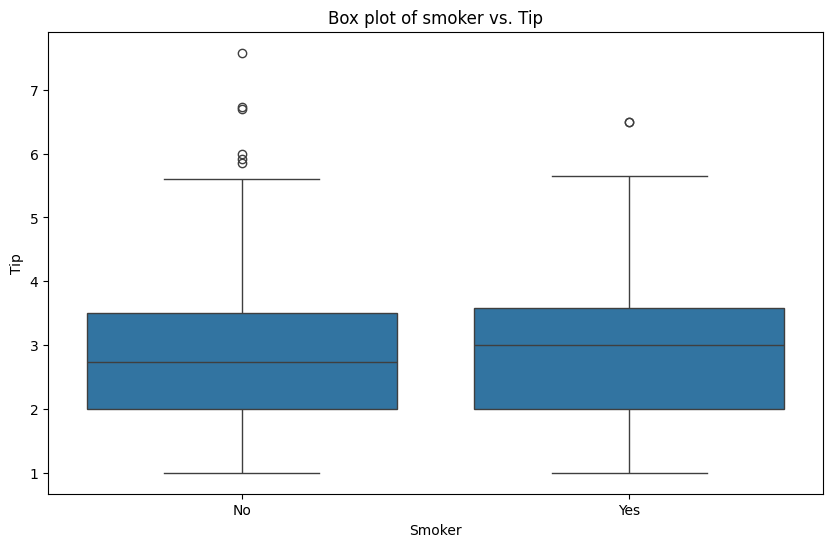

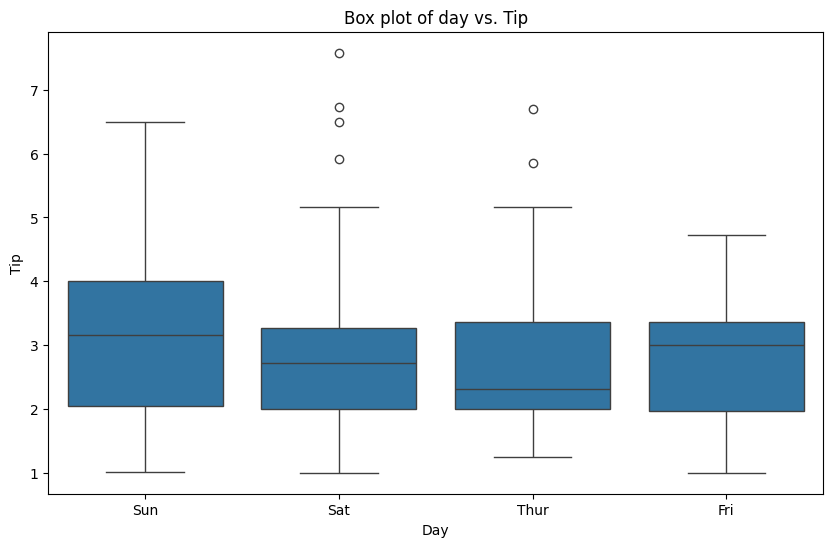

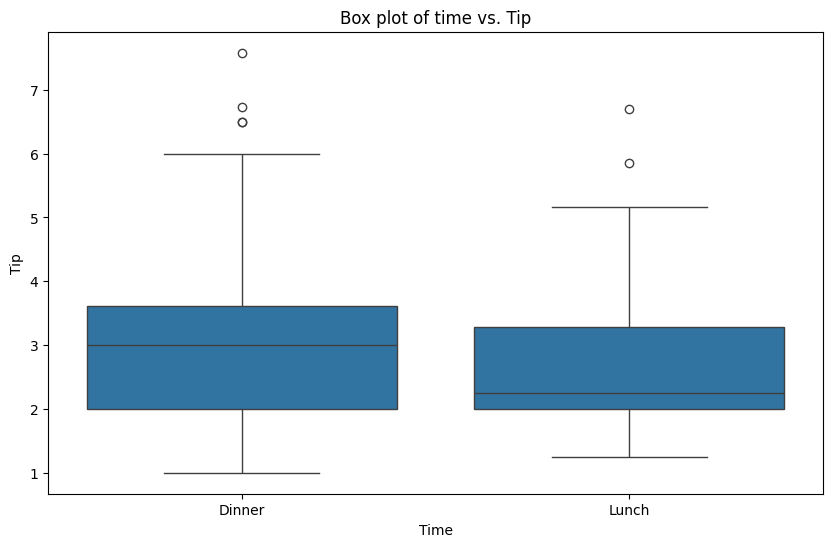

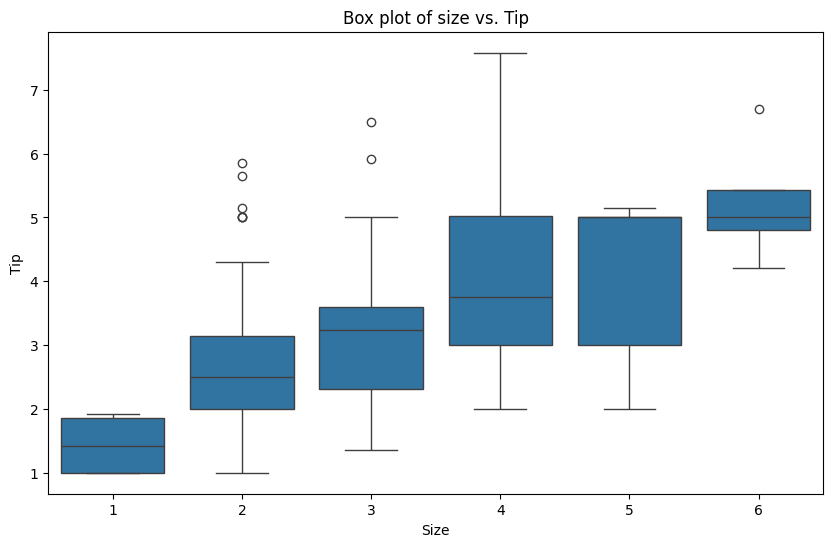

In [ ]:
# Scatter plot for total_bill vs. tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=dataset)
plt.title('Scatter plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Scatter plots for categorical variables vs. tip
categorical_columns = ['sex', 'smoker', 'day', 'time', 'size']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='tip', data=dataset)
    plt.title(f'Box plot of {col} vs. Tip')
    plt.xlabel(col.capitalize())
    plt.ylabel('Tip')
    plt.show()


Patterns and Trends

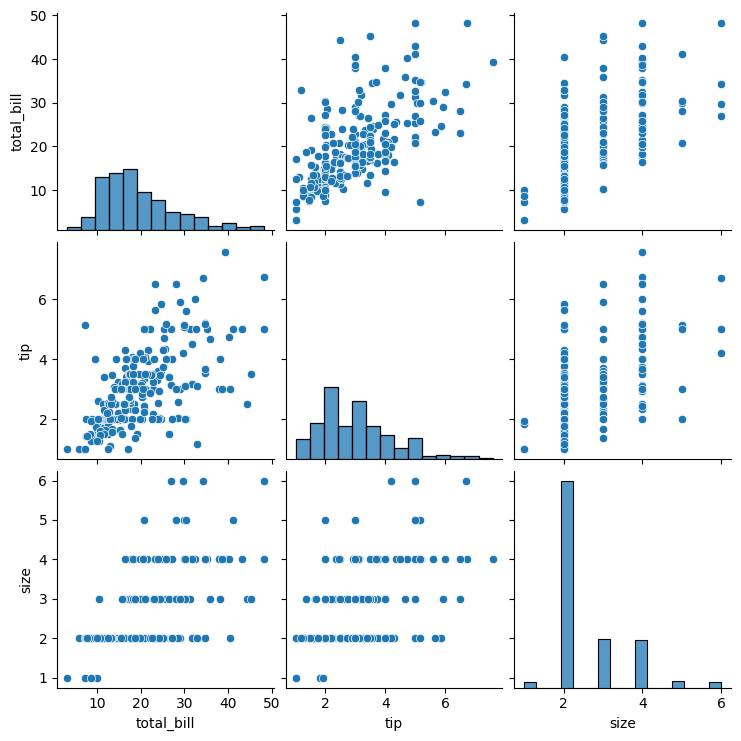

In [ ]:
# Pair plot for the dataset
sns.pairplot(dataset)
plt.show()

Correlation Chart

Text(0.5, 1.0, 'Correlation Matrix')

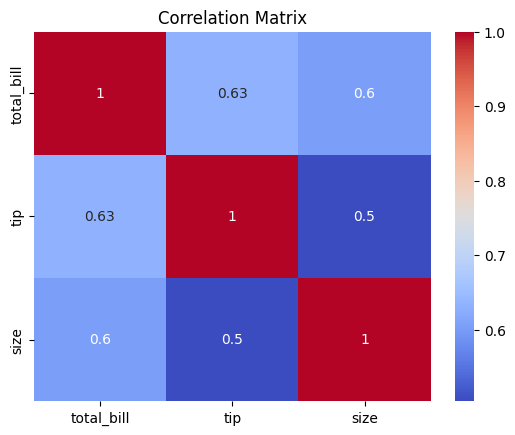

In [ ]:
# Correlation matrix
df = dataset[['total_bill', 'tip', 'size']]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Data Formatting

Features

In [ ]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = dataset.drop('tip', axis=1)
y = dataset['tip']

In [ ]:
print(dataset.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


Data Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Define categorical and numerical features
categorical_features = ['sex', 'smoker', 'day', 'time']
numerical_features = ['total_bill', 'size']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Define the pipeline for simple linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Use LinearRegression instead of Ridge
])


# Train Model

In [ ]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_bill', 'size']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('regressor', LinearRegression())])

Predict using Model

In [ ]:
# Predict with the best model
y_pred = model.predict(X_test)

# Model Evaluation

Evaluating Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.688879300766312
R-squared: 0.5114123954499075


Comparing Predicted and Actual Values

     Index  Actual  Predicted
6        6    2.00   2.130740
9        9    3.23   2.569734
10      10    1.71   2.240306
15      15    3.92   3.066433
16      16    1.67   2.505179
18      18    3.50   2.990191
19      19    3.35   3.100153
24      24    3.18   2.799055
25      25    2.34   3.133179
30      30    1.45   2.048894
33      33    2.45   3.363565
38      38    2.31   2.956987
45      45    3.00   2.826118
60      60    3.21   2.710571
66      66    2.47   2.572917
67      67    1.00   1.232303
73      73    5.00   3.095080
75      75    1.25   2.119016
82      82    1.83   1.915846
93      93    4.30   2.446116
96      96    4.00   3.226658
108    108    3.76   2.683646
111    111    1.00   1.660442
112    112    4.00   4.511398
113    113    2.55   3.239547
117    117    1.50   2.198682
126    126    1.48   2.023079
127    127    2.00   2.481362
137    137    2.00   2.454336
150    150    2.50   2.517873
152    152    2.74   2.991354
155    155    5.14   4.411939
161    161

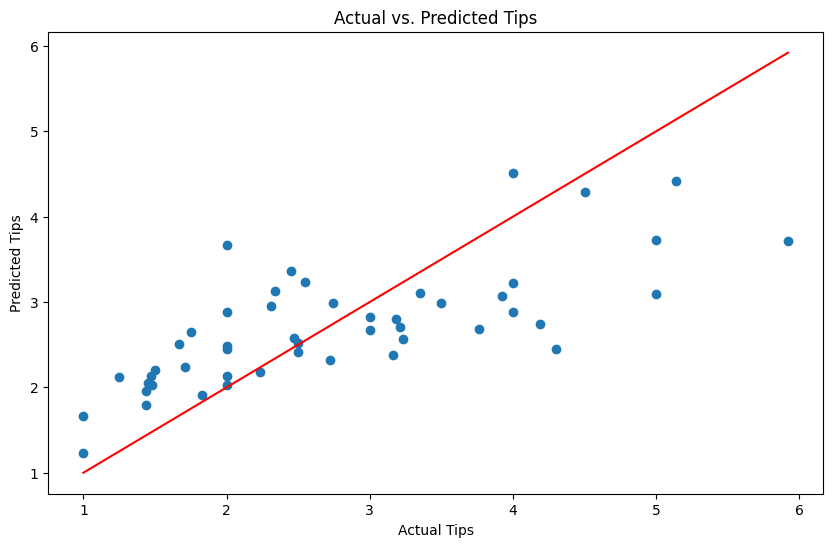

In [ ]:
import pandas as pd
comparison = pd.DataFrame({'Index': y_test.index, 'Actual': y_test, 'Predicted': y_pred})

# Sort by original index to align with original data order
comparison = comparison.sort_values(by='Index')

# Display the comparison
print(comparison)

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison['Actual'], comparison['Predicted'])
plt.plot([min(comparison['Actual']), max(comparison['Actual'])],
         [min(comparison['Actual']), max(comparison['Actual'])], color='red')  # Line of perfect prediction

plt.title('Actual vs. Predicted Tips')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.show()

Residual Analysis

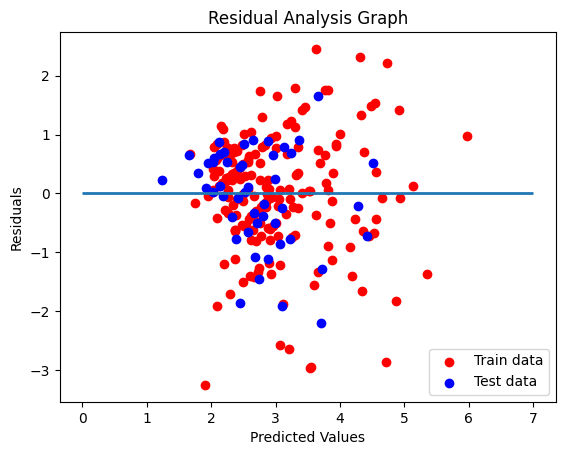

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 7, y = 0, linewidth = 2)
plt.title('Residual Analysis Graph')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 4)
plt.show()

# **Improved Model [Using Ridge Regression]**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# Define features and target
X = dataset.drop('tip', axis=1)
y = dataset['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['sex', 'smoker', 'day', 'time']
numerical_features = ['total_bill', 'size']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),  # Polynomial feature generation
    ('regressor', Ridge())  # Ridge regression
])

# Define parameter grid
param_grid = {
    'poly__degree': [2, 3, 4],  # Test different polynomial degrees
    'poly__include_bias': [False],  # Bias term in polynomial features
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Test different alpha values for Ridge
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print(f'Best parameters: {grid_search.best_params_}')

# Predict with the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best parameters: {'poly__degree': 2, 'poly__include_bias': False, 'regressor__alpha': 10.0}
Mean Squared Error: 0.6029178625882938
R-squared: 0.5723805405463825


Compare Values

     Index  Actual  Predicted
6        6    2.00   1.750766
9        9    3.23   2.540393
10      10    1.71   1.959416
15      15    3.92   3.284818
16      16    1.67   2.062610
18      18    3.50   2.896886
19      19    3.35   3.362227
24      24    3.18   3.111694
25      25    2.34   2.964613
30      30    1.45   1.657903
33      33    2.45   3.497583
38      38    2.31   3.090437
45      45    3.00   2.944400
60      60    3.21   2.659762
66      66    2.47   2.610914
67      67    1.00   1.419156
73      73    5.00   2.894479
75      75    1.25   1.809086
82      82    1.83   1.386970
93      93    4.30   2.695556
96      96    4.00   3.099594
108    108    3.76   2.911519
111    111    1.00   1.171724
112    112    4.00   4.713054
113    113    2.55   3.507098
117    117    1.50   1.648938
126    126    1.48   1.401148
127    127    2.00   2.219740
137    137    2.00   2.167383
150    150    2.50   2.453546
152    152    2.74   2.815359
155    155    5.14   4.297212
161    161

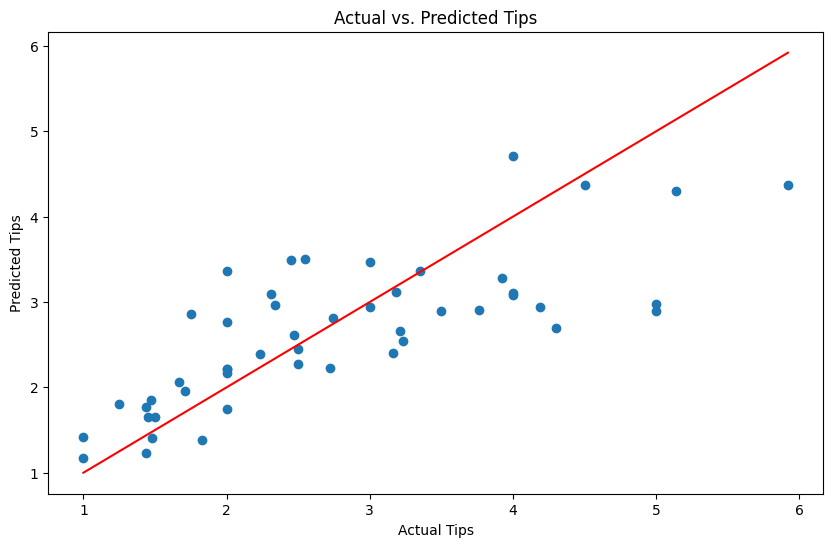

In [ ]:
comparison = pd.DataFrame({'Index': y_test.index, 'Actual': y_test, 'Predicted': y_pred})

# Sort by original index to align with original data order
comparison = comparison.sort_values(by='Index')

# Display the comparison
print(comparison)

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison['Actual'], comparison['Predicted'])
plt.plot([min(comparison['Actual']), max(comparison['Actual'])],
         [min(comparison['Actual']), max(comparison['Actual'])], color='red')  # Line of perfect prediction

plt.title('Actual vs. Predicted Tips')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.show()

Residual Analysis

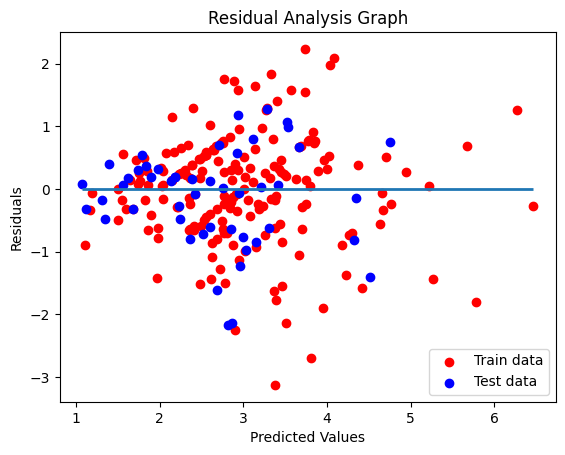

In [ ]:
model.fit(X_train, y_train)

# Predict with the fitted model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Residual analysis plot
plt.scatter(y_train_pred, y_train_pred - y_train, color='red', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, color='blue', label='Test data')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), linewidth=2)
plt.title('Residual Analysis Graph')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc=4)
plt.show()